# Clustering de datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("/home/linar/Desktop/ML/Clases/i302/TP4/data/clustering.csv")
# Me quedo con las dos features, elimino la columna de idx
df = df.iloc[:, 1:]
df.head()

,A,B
0,812954,643720
1,868217,609046
2,920248,607272
3,841621,639394
4,843907,598777


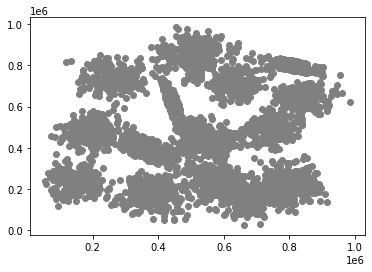

In [2]:
# Visualizo dataset original
plt.scatter(df["A"], df["B"], color="gray")

## (a) Implementar el algoritmo K-means, y usando el mismo determinar la cantidad de clusters y sus centroides. Graficar los datos mostrando a qué cluster pertenece cada dato (usando colores/marcadores distintos para cada cluster), y también mostrar el centroide de cada cluster.

In [5]:
%load_ext autoreload
%autoreload 2

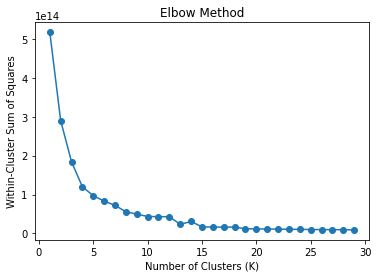

In [3]:
from kmeans import KMeans, calculate_wcss, plot_elbow_method

# Método del codo
X = df.values
for k in range(1,30):
    calculate_wcss(X, k)
plot_elbow_method(X, max_clusters=k)

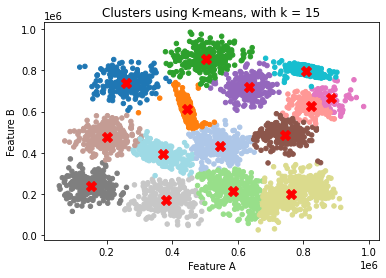

In [4]:
# Run model with chosen k
k = 15
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
centroids = kmeans.centroids
labels = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='tab20')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=100, c='red', marker='X')
plt.title(f'Clusters using K-means, with k = {k}',)
plt.xlabel('Feature A')
plt.ylabel('Feature B')
plt.show()

## (b) Implementar un Gaussian Mixture Model (GMM) y realizar la misma tarea que en el inciso anterior. Recuerde que puede inicializar la optimización de GMM con una corrida de K-means.

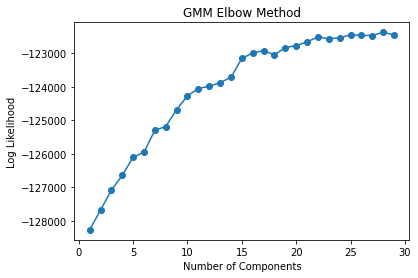

In [7]:
from GMM import *
# Método del codo for GMM
bic_values = []
for k in range(1, 30):
    gmm = GMM(n_components=k, max_iter=100, tol=1e-4, random_state=0)
    gmm.fit(X)
    bic_values.append(gmm._compute_log_likelihood(X))

# Plot elbow method for GMM
plt.plot(range(1, 30), bic_values, marker='o', linestyle='-')
plt.title('GMM Elbow Method')
plt.xlabel('Number of Components')
plt.ylabel('Log Likelihood')  # Using Log Likelihood as proxy for BIC
plt.show()

In [8]:
# Choose the best k based on the elbow method
best_k = np.argmax(bic_values) + 1
print("Best number of components (k) based on the elbow method:", best_k)

Best number of components (k) based on the elbow method: 28


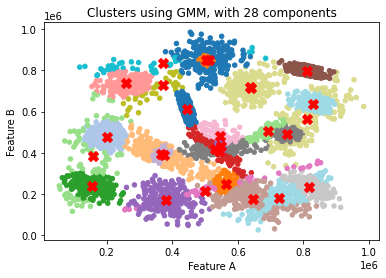

In [9]:
# Fit GMM with the best k
gmm = GMM(n_components=best_k, max_iter=100, tol=1e-4, random_state=0)
gmm.fit(X)
labels = gmm.predict(X)

# Plot clusters and centroids for GMM
plot_clusters_gmm(X, gmm.means, labels, f'Clusters using GMM, with {gmm.n_components} components')